In [ ]:
## feature engineering

In [2]:
import os
import numpy as np
import pandas as pd
from datetime import date

from sklearn.model_selection import KFold, train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, roc_auc_score, auc, roc_curve
from sklearn.preprocessing import MinMaxScaler

DATA_ROOT = "."

In [3]:
dfoff = pd.read_csv(os.path.join(DATA_ROOT,'doff_feature.csv'))
dftest = pd.read_csv(os.path.join(DATA_ROOT,'dtest_feature.csv'))

In [4]:
dfoff.head()

,Unnamed: 0,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,label,weekday,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7,discount_rate,discount_man,discount_jian,discount_type
0,0,1439408,2632,NaN,NaN,0.0,NaN,20160217.0,-1,NaN,...,0,0,0,0,0,0,NaN,0,0,0
1,1,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN,0,3.0,...,0,1,0,0,0,0,0.95,20,1,1
2,2,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN,0,6.0,...,0,0,0,0,1,0,0.95,20,1,1
3,3,1832624,3381,7610.0,200:20,0.0,20160429.0,NaN,0,5.0,...,0,0,0,1,0,0,0.90,200,20,1
4,4,2029232,3381,11951.0,200:20,1.0,20160129.0,NaN,0,5.0,...,0,0,0,1,0,0,0.90,200,20,1


In [6]:
from matplotlib import pylab
%pylab inline

Populating the interactive namespace from numpy and matplotlib


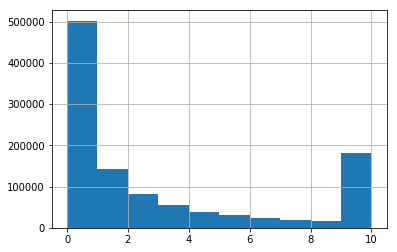

In [9]:
dfoff.Distance[dfoff.Distance <30].hist()

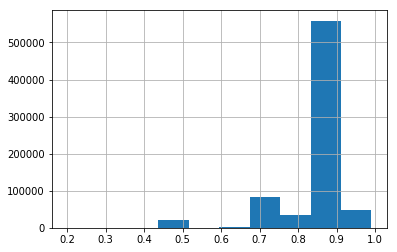

In [10]:
dfoff.discount_rate.hist()

In [13]:
dfoff.weekday.value_counts()

7.0    151239
5.0    125726
1.0    119318
6.0    108135
4.0     91726
3.0     76305
2.0     74520
Name: weekday, dtype: int64

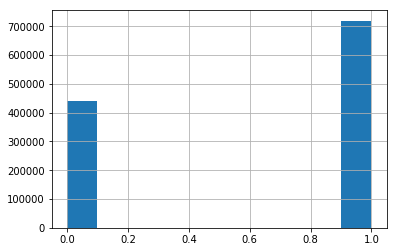

In [14]:
dfoff.discount_type.hist()

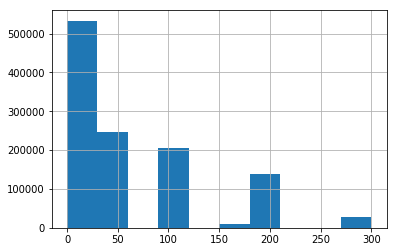

In [15]:
dfoff.discount_man.hist()

In [18]:
dfoff.discount_man.value_counts()

0      441232
100    204677
30     180897
200    138079
50      65345
20      63434
300     28918
10      27889
150      9670
5         601
Name: discount_man, dtype: int64

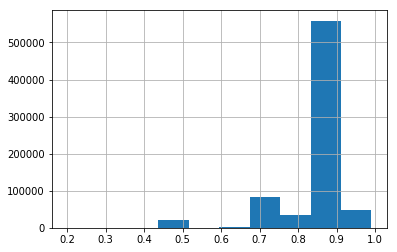

In [19]:
dfoff.discount_rate.hist()

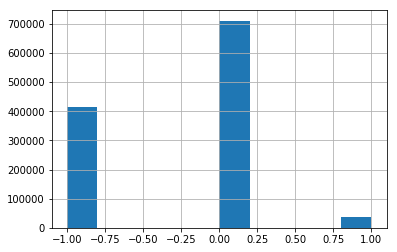

In [20]:
dfoff.label.hist()

In [22]:
dfoff.corr()['label']

Unnamed: 0      -0.000955
User_id         -0.000863
Merchant_id     -0.006524
Coupon_id        0.014643
Distance         0.222471
Date_received    0.090294
Date             0.011166
label            1.000000
weekday         -0.016272
weekday_type          NaN
weekday_1        0.234004
weekday_2        0.190574
weekday_3        0.193491
weekday_4        0.209967
weekday_5        0.244123
weekday_6        0.225822
weekday_7        0.264702
discount_rate   -0.078597
discount_man     0.506418
discount_jian    0.526072
discount_type    0.893634
Name: label, dtype: float64

In [23]:
def dist_gen(data):
    data_dummy = pd.get_dummies(data.Distance)
    data_new = data.copy()
    dist_list = list(map(lambda x:"dis_"+x, data_dummy.columns.astype(str).tolist()))
    data_new[dist_list] = data_dummy
    return data_new


In [24]:
dfoff_dist = dist_gen(dfoff)
dfoff_dist.head()

,Unnamed: 0,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,label,weekday,...,dis_2.0,dis_3.0,dis_4.0,dis_5.0,dis_6.0,dis_7.0,dis_8.0,dis_9.0,dis_10.0,dis_99.0
0,0,1439408,2632,NaN,NaN,0.0,NaN,20160217.0,-1,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN,0,3.0,...,0,0,0,0,0,0,0,0,0,0
2,2,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN,0,6.0,...,0,0,0,0,0,0,0,0,0,0
3,3,1832624,3381,7610.0,200:20,0.0,20160429.0,NaN,0,5.0,...,0,0,0,0,0,0,0,0,0,0
4,4,2029232,3381,11951.0,200:20,1.0,20160129.0,NaN,0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
dfoff_dist.corr()['label']

Unnamed: 0      -0.000955
User_id         -0.000863
Merchant_id     -0.006524
Coupon_id        0.014643
Distance         0.222471
Date_received    0.090294
Date             0.011166
label            1.000000
weekday         -0.016272
weekday_type          NaN
weekday_1        0.234004
weekday_2        0.190574
weekday_3        0.193491
weekday_4        0.209967
weekday_5        0.244123
weekday_6        0.225822
weekday_7        0.264702
discount_rate   -0.078597
discount_man     0.506418
discount_jian    0.526072
discount_type    0.893634
dis_0.0         -0.337222
dis_1.0          0.010912
dis_2.0          0.046296
dis_3.0          0.048162
dis_4.0          0.048713
dis_5.0          0.046263
dis_6.0          0.043834
dis_7.0          0.041549
dis_8.0          0.038540
dis_9.0          0.037418
dis_10.0         0.177407
dis_99.0         0.180789
Name: label, dtype: float64

In [44]:
dfoff.groupby('Distance').size()

Distance
0.0     501931
1.0     143551
2.0      82186
3.0      54214
4.0      39495
5.0      30317
6.0      23976
7.0      19029
8.0      15982
9.0      13358
10.0    166877
99.0     69826
dtype: int64

In [43]:
dfoff[dfoff.Distance== 99].label.value_counts()

0    66036
1     3790
Name: label, dtype: int64

In [45]:
from sklearn.ensemble import RandomForestClassifier
def check_model_forest(data, predictors):
    clf = RandomForestClassifier(n_estimators=50, max_depth=10,
                             random_state=0)
    rt = clf.fit(data[predictors], 
                                  data['label'])
    return rt

In [154]:
from sklearn.metrics import f1_score
def check_result(model,predictors,valid):
    y_valid_pred = model.predict_proba(valid[predictors])
    valid1 = valid.copy()
    valid1['pred_prob'] = y_valid_pred[:, 1]
    from sklearn.metrics import roc_auc_score, accuracy_score
    auc_score = roc_auc_score(y_true=valid.label, y_score=y_valid_pred[:,1])
    acc = accuracy_score(y_true=valid.label, y_pred=y_valid_pred.argmax(axis=1))
    f1 = f1_score(y_true=valid.label, y_pred=y_valid_pred.argmax(axis=1))
    print("Validation AUC: {:.3f}, Accuracy: {:.3f},f1:{:.3f}".format(auc_score, acc,f1))

In [47]:
from sklearn.ensemble import RandomForestClassifier
def check_model_forest(data, predictors):
    clf = RandomForestClassifier(n_estimators=50, max_depth=10,
                             random_state=0)
    rt = clf.fit(data[predictors], 
                                  data['label'])
    return rt

In [48]:
dftest_dist =dist_gen(dftest)

In [49]:
## Naive model
def split_train_valid(row, date_cut="20160416"):
    is_train = True if pd.to_datetime(row, format="%Y%m%d") < pd.to_datetime(date_cut, format="%Y%m%d") else False
    return is_train
    
df = dfoff_dist[dfoff_dist['label'] != -1].copy()
df["is_train"] = df["Date_received"].apply(split_train_valid)
train = df[df["is_train"]]
valid = df[~df["is_train"]]
train.reset_index(drop=True, inplace=True)
valid.reset_index(drop=True, inplace=True)
print("Train size: {}, #positive: {}".format(len(train), train["label"].sum()))
print("Valid size: {}, #positive: {}".format(len(valid), valid["label"].sum()))

Train size: 667753, #positive: 32472
Valid size: 79216, #positive: 3832


In [50]:
train.columns

Index(['Unnamed: 0', 'User_id', 'Merchant_id', 'Coupon_id', 'Discount_rate',
       'Distance', 'Date_received', 'Date', 'label', 'weekday', 'weekday_type',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weekday_7', 'discount_rate', 'discount_man',
       'discount_jian', 'discount_type', 'dis_0.0', 'dis_1.0', 'dis_2.0',
       'dis_3.0', 'dis_4.0', 'dis_5.0', 'dis_6.0', 'dis_7.0', 'dis_8.0',
       'dis_9.0', 'dis_10.0', 'dis_99.0', 'is_train'],
      dtype='object')

In [59]:
ft = ['Date_received', 'Date', 'label', 'weekday', 'weekday_type',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weekday_7', 'discount_rate', 'discount_man',
       'discount_jian', 'discount_type', 'dis_0.0', 'dis_1.0', 'dis_2.0',
       'dis_3.0', 'dis_4.0', 'dis_5.0', 'dis_6.0', 'dis_7.0', 'dis_8.0',
       'dis_9.0', 'dis_10.0']

In [56]:
train.discount_type.value_counts()

1    642491
0     25262
Name: discount_type, dtype: int64

In [63]:
of = ['discount_rate', 'discount_type', 'discount_man', 'discount_jian', 'Distance', 'weekday', 'weekday_type', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weekday_7']
nof = of +['dis_0.0']
check_model_forest(train, nof)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [64]:
def feature_check(f,train,valid):
    predictors = f
    print(predictors)

    model2 = check_model_forest(train, predictors)
    check_result(model2, predictors, valid)

In [65]:
feature_check(nof,train,valid)

['discount_rate', 'discount_type', 'discount_man', 'discount_jian', 'Distance', 'weekday', 'weekday_type', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weekday_7', 'dis_0.0']
Validation AUC: 0.790, Accuracy: 0.952


In [66]:
ndist_f = ['discount_rate', 'discount_type', 'discount_man', 'discount_jian', 'weekday', 'weekday_type', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weekday_7']
feature_check(ndist_f,train,valid)

['discount_rate', 'discount_type', 'discount_man', 'discount_jian', 'weekday', 'weekday_type', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weekday_7']
Validation AUC: 0.774, Accuracy: 0.952


In [69]:
dist_f = ['dis_0.0', 'dis_1.0', 'dis_2.0',
       'dis_3.0', 'dis_4.0', 'dis_5.0', 'dis_6.0', 'dis_7.0', 'dis_8.0',
       'dis_9.0', 'dis_10.0','dis_99.0']
feature_check(ndist_f+dist_f,train,valid)

['discount_rate', 'discount_type', 'discount_man', 'discount_jian', 'weekday', 'weekday_type', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weekday_7', 'dis_0.0', 'dis_1.0', 'dis_2.0', 'dis_3.0', 'dis_4.0', 'dis_5.0', 'dis_6.0', 'dis_7.0', 'dis_8.0', 'dis_9.0', 'dis_10.0', 'dis_99.0']
Validation AUC: 0.789, Accuracy: 0.952


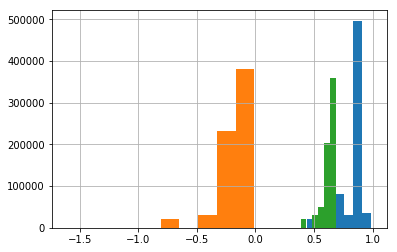

In [83]:
import numpy as np
train.discount_rate.hist()
np.log(train.discount_rate).hist()
np.log1p(train.discount_rate).hist()

In [85]:
np.log1p(train.discount_rate)

0         0.667829
1         0.667829
2         0.641854
3         0.405465
4         0.641854
5         0.641854
6         0.641854
7         0.559616
8         0.606136
9         0.667829
10        0.606136
11        0.606136
12        0.559616
13        0.606136
14        0.641854
15        0.606136
16        0.405465
17        0.641854
18        0.606136
19        0.641854
20        0.606136
21        0.641854
22        0.587787
23        0.641854
24        0.641854
25        0.641854
26        0.641854
27        0.559616
28        0.606136
29        0.606136
            ...   
667723    0.615186
667724    0.641854
667725    0.641854
667726    0.606136
667727    0.641854
667728    0.606136
667729    0.641854
667730    0.606136
667731    0.641854
667732    0.641854
667733    0.641854
667734    0.641854
667735    0.641854
667736    0.641854
667737    0.641854
667738    0.641854
667739    0.587787
667740    0.587787
667741    0.659246
667742    0.641854
667743    0.641854
667744    0.

In [90]:
train.discount_jian.size

667753

In [106]:
train_lop1p = pd.Series( np.log1p(train.discount_rate),name="t_r")
train['aaa'] = train.discount_rate.copy()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [141]:
dfoff_dist['drate_lop'] = dfoff_dist.discount_rate.copy()

In [142]:
dfoff_dist['drate_lop']  = dfoff_dist['drate_lop'].apply(np.log1p)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log1p
  """Entry point for launching an IPython kernel.


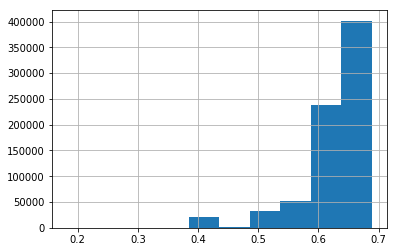

In [143]:
np.log1p(dfoff_dist['discount_rate']).hist()

In [144]:
df = dfoff_dist[dfoff_dist['label'] != -1].copy()
df["is_train"] = df["Date_received"].apply(split_train_valid)
train = df[df["is_train"]]
valid = df[~df["is_train"]]
train.reset_index(drop=True, inplace=True)
valid.reset_index(drop=True, inplace=True)
print("Train size: {}, #positive: {}".format(len(train), train["label"].sum()))
print("Valid size: {}, #positive: {}".format(len(valid), valid["label"].sum()))

Train size: 667753, #positive: 32472
Valid size: 79216, #positive: 3832


In [155]:
dftr = ['drate_lop', 'discount_type', 'discount_man', 'discount_jian', 'weekday', 'weekday_type', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weekday_7', 'dis_0.0', 'dis_1.0', 'dis_2.0', 'dis_3.0', 'dis_4.0', 'dis_5.0', 'dis_6.0', 'dis_7.0', 'dis_8.0', 'dis_9.0', 'dis_10.0', 'dis_99.0']
feature_check(dftr,train,valid)

['drate_lop', 'discount_type', 'discount_man', 'discount_jian', 'weekday', 'weekday_type', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weekday_7', 'dis_0.0', 'dis_1.0', 'dis_2.0', 'dis_3.0', 'dis_4.0', 'dis_5.0', 'dis_6.0', 'dis_7.0', 'dis_8.0', 'dis_9.0', 'dis_10.0', 'dis_99.0']
Validation AUC: 0.789, Accuracy: 0.952,f1:0.000


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
sklearn.metrics.f1_score

In [157]:
dftest_dist['drate_lop'] = dftest_dist.discount_rate.apply(np.log1p)

In [159]:
model2 = check_model_forest(train, dftr)
check_result(model2, dftr, train)

gen_report(dftest_dist,model2,c,"rate.csv")

Validation AUC: 0.830, Accuracy: 0.951,f1:0.000


NameError: name 'gen_report' is not defined

In [160]:
def gen_report(dftest,model,predictors,report_csv):
    targetset = dftest.copy()
    print(targetset.shape)
    targetset = targetset[~targetset.Coupon_id.isna()]
    targetset.reset_index(drop=True, inplace=True)
    testset = targetset[predictors].copy()

    y_test_pred = model.predict_proba(testset[predictors])
    test1 = testset.copy()
    test1['pred_prob'] = y_test_pred[:, 1]
    print(test1.shape)
    output = pd.concat((targetset[["User_id", "Coupon_id", "Date_received"]], test1["pred_prob"]), axis=1)
    print(output.shape)

    output.loc[:, "User_id"] = output["User_id"].apply(lambda x:str(int(x)))
    output.loc[:, "Coupon_id"] = output["Coupon_id"].apply(lambda x:str(int(x)))
    output.loc[:, "Date_received"] = output["Date_received"].apply(lambda x:str(int(x)))
    output["uid"] = output[["User_id", "Coupon_id", "Date_received"]].apply(lambda x: '_'.join(x.values), axis=1)
    output.reset_index(drop=True, inplace=True)
### NOTE: YOUR SUBMITION FILE SHOULD HAVE COLUMN NAME: uid, label
    out = output.groupby("uid", as_index=False).mean()
    out = out[["uid", "pred_prob"]]
    out.columns = ["uid", "label"]
# out.to_csv("baseline_example.csv", header=["uid", "label"], index=False) # submission format
    out.head()
    
    out.to_csv(report_csv, header=["uid", "label"], index=False) # submission format


In [162]:
gen_report(dftest_dist,model2,dftr,"rate.csv")

(306313, 33)
(306313, 26)
(306313, 4)
